# Random Forest Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('/content/Ice_cream selling data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,1:].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Random Forest Regression model on the whole dataset

In [4]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10, random_state=0)

## Predicting the Test set results

In [5]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 1.75  0.95]
 [31.73 32.28]
 [ 3.24  0.79]
 [ 5.52  3.78]
 [ 7.51  8.94]
 [16.5  12.57]
 [10.69  7.41]
 [20.43 22.84]
 [23.19 25.37]
 [19.96 13.28]]


## Evaluating the Model Performance

In [6]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9108929158097305

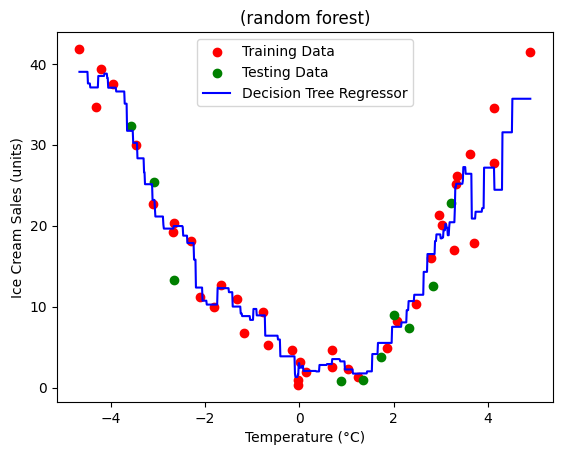

In [10]:
X_grid = np.arange(np.min(X), np.max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red', label = 'Training Data')
plt.scatter(X_test, y_test, color = 'green', label = 'Testing Data')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue', label = 'Random forest ')
plt.title('(random forest)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.legend()
plt.show()